In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
import seaborn as sns
import calendar 

from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler


In [123]:
train_data_path = r"C:\Users\supri\Desktop\python\jupyter\data\train.csv"
test_data_path = r"C:\Users\supri\Desktop\python\jupyter\data\test.csv"

house_train = pd.read_csv(train_data_path)
house_test = pd.read_csv(test_data_path)

print("shape of house_train", house_train.shape)
print("shape of house_test", house_test.shape)

shape of house_train (1460, 81)
shape of house_test (1459, 80)


In [124]:
house_train.head()
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [125]:
df =  pd.concat([house_train, house_test])
print("shape of integrated data of :", df.shape)

shape of integrated data of : (2919, 81)


In [126]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [127]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


Get the brief informetion of dataset


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [129]:
int_features = df.select_dtypes(include=["int64"]).columns
print("total number of integer fetures: ", int_features.shape[0])

print("integar feature name:", int_features.tolist())

total number of integer fetures:  26
integar feature name: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [130]:
float_features = df.select_dtypes(include=["float64"]).columns
print("total number of float fetures: ", float_features.shape[0])

print("float feature name:", float_features.tolist())

total number of float fetures:  12
float feature name: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [131]:
object_features = df.select_dtypes(include=["object"]).columns
print("total number of object fetures: ", object_features.shape[0])

print("object feature name:", object_features.tolist())

total number of object fetures:  43
object feature name: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [132]:
cat_features = df.select_dtypes(include=["object"]).columns
print("total number of catagorical  fetures: ", cat_features.shape[0])

print("catagorical feature name:", cat_features.tolist())

total number of catagorical  fetures:  43
catagorical feature name: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the statistical information of Numerical Features

In [133]:
def new_func():
    df.describe()

new_func()

In [134]:
df.describe().shape

(8, 38)

## Visualise null/ Missing value

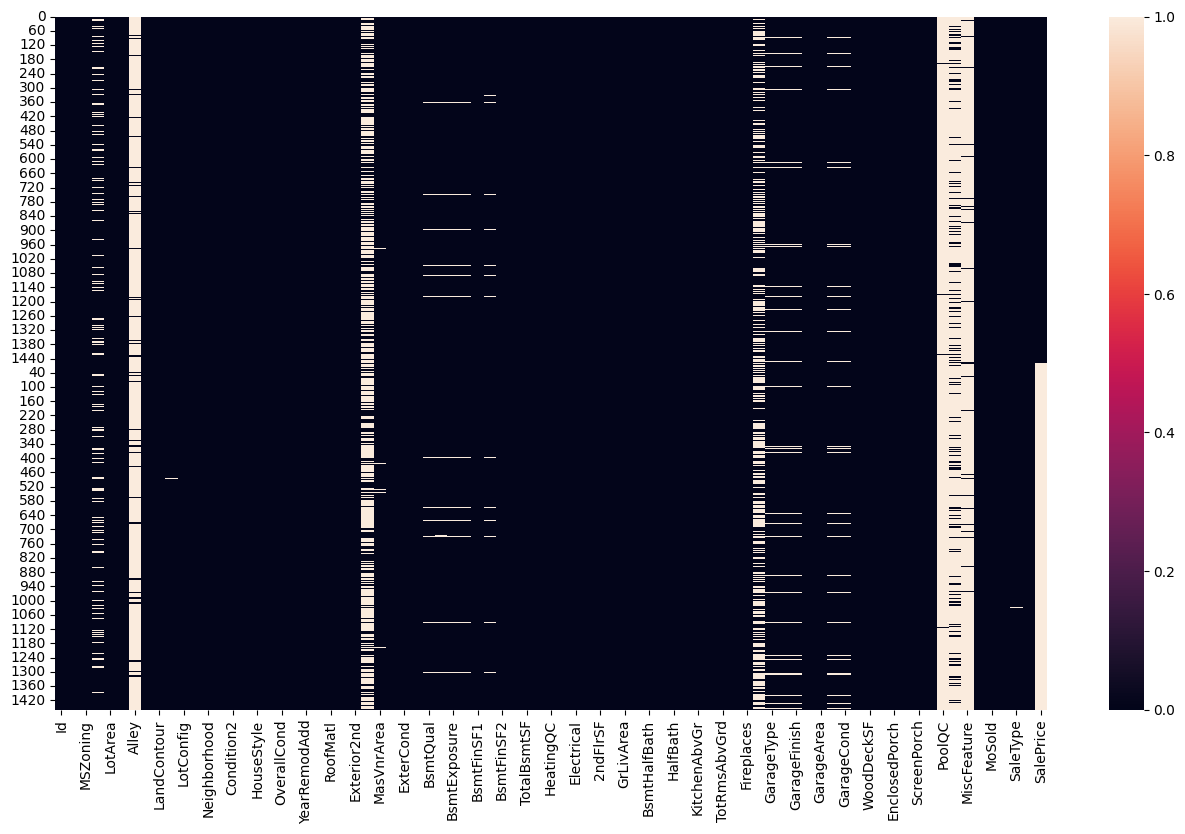

In [135]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

## Get the null  value percentage for ever features


In [136]:
#set index as id column
df = df.set_index("Id")

In [137]:
null_count= df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [138]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

# Drop column features

In [139]:
"""as per domain knowledge we will not drop thoose featres, insead None value we will add constant value NA """
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [140]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [141]:
"""as per domain knowledge we will not drop thoose featres, insead None value we will add constant value NA """ 
miss_value_20_perc = null_percent[(null_percent > 20) & (null_percent < 50)]
miss_value_20_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [142]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 20)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [143]:
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

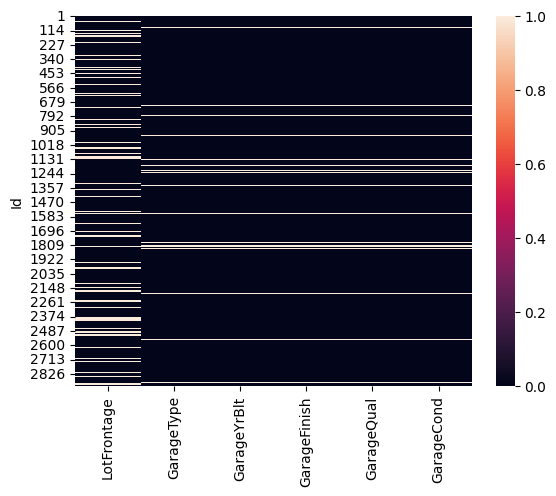

In [144]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

In [145]:
missing_value_feat = null_percent[null_percent > 0]
print("total mising value features =", len(missing_value_feat))

total mising value features = 35


In [146]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [147]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("total number of cat feature", len(cat_na_feat))
print(cat_na_feat)

total number of cat feature 23
MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64


In [148]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("total number of cat feature", len(int_na_feat))
print(int_na_feat)

total number of cat feature 0
Series([], dtype: float64)


In [149]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("total number of cat feature", len(float_na_feat))
print(float_na_feat)

total number of cat feature 12
LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64


## Handling MSZoning


In [150]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

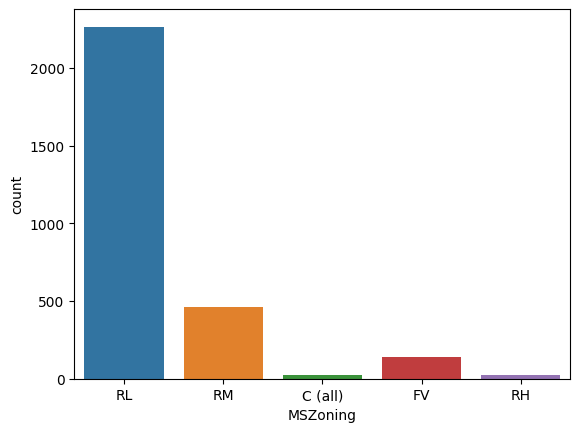

In [151]:

sns.countplot(x="MSZoning", data= df)
plt.show()


In [152]:
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [153]:
msZoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,msZoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()

0

In [154]:
def oldnewCountplot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(x= feature, data= df)

    plt.subplot(122)
    sns.countplot(x= feature, data= df_new)
    plt.show()

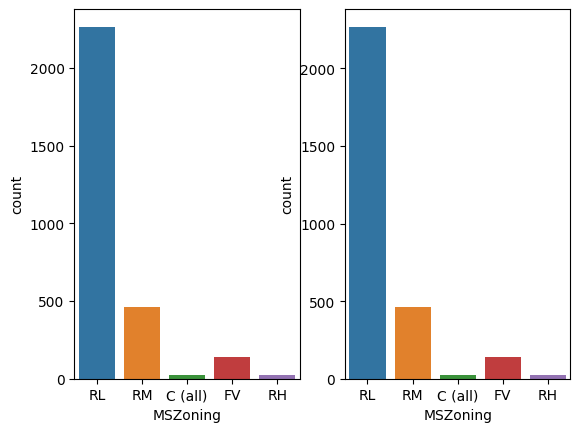

In [155]:
oldnewCountplot(df, df_mvi, "MSZoning" )

##  Handling Alley = 93.21685

In [156]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [157]:
Alley_cons = "NA"
df_mvi["Alley"].replace(np.nan, "Alley_cons", inplace= True )
df_mvi["Alley"].isnull().sum()

0

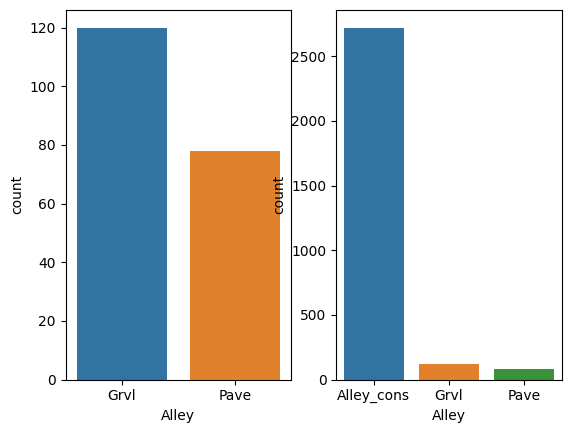

In [158]:
oldnewCountplot(df, df_mvi, "Alley" )

## Handeling Lotfrontge = 16.649538

In [159]:
def boxHistplot(df, feature,figsize=(16, 5)):
    plt.figure(figsize= figsize)
    plt.subplot(121)
    sns.boxplot(x = feature, data= df )
    plt.subplot(122)
    sns.histplot(x= feature, data=df )


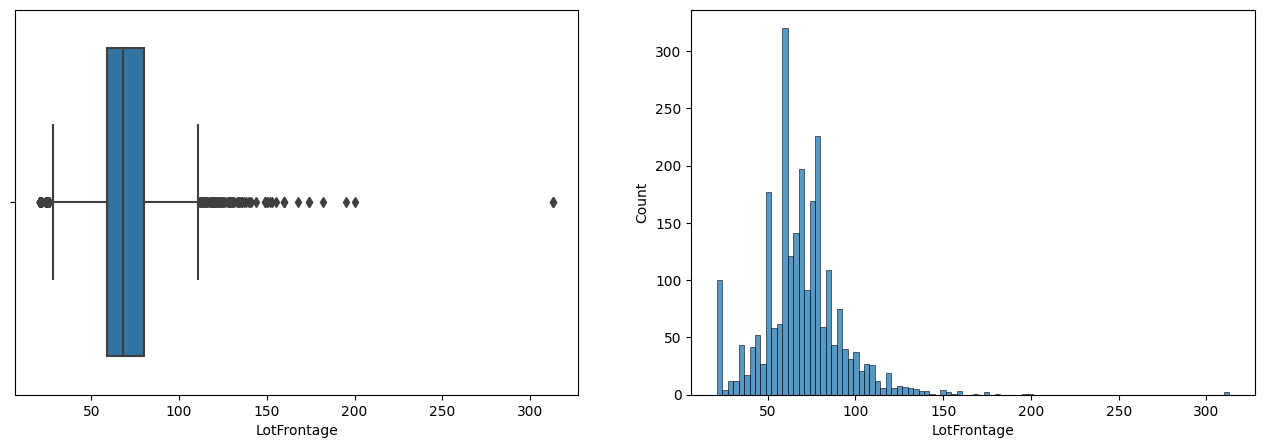

In [160]:
boxHistplot(df, "LotFrontage")



In [161]:
lotfortage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotfortage_mean, inplace= True)
df_mvi["LotFrontage"].isnull().sum()

0

In [162]:
def oldnewboxHistplot(df, df_new, feature,figsize=(16,10)):
    plt.figure(figsize= figsize)
    plt.subplot(221)
    sns.boxplot(x = feature, data= df )
    plt.title("old data distribution")
    plt.subplot(222)
    sns.distplot(df[feature] )
    plt.title("old data distribution")
    plt.subplot(223)
    sns.boxplot(x = feature, data= df_new )
    plt.title("new data distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature] )
    plt.title("New data distribution")

C:\Users\supri\AppData\Local\Temp\ipykernel_19164\623834056.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature] )
C:\Users\supri\AppData\Local\Temp\ipykernel_19164\623834056.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature] )


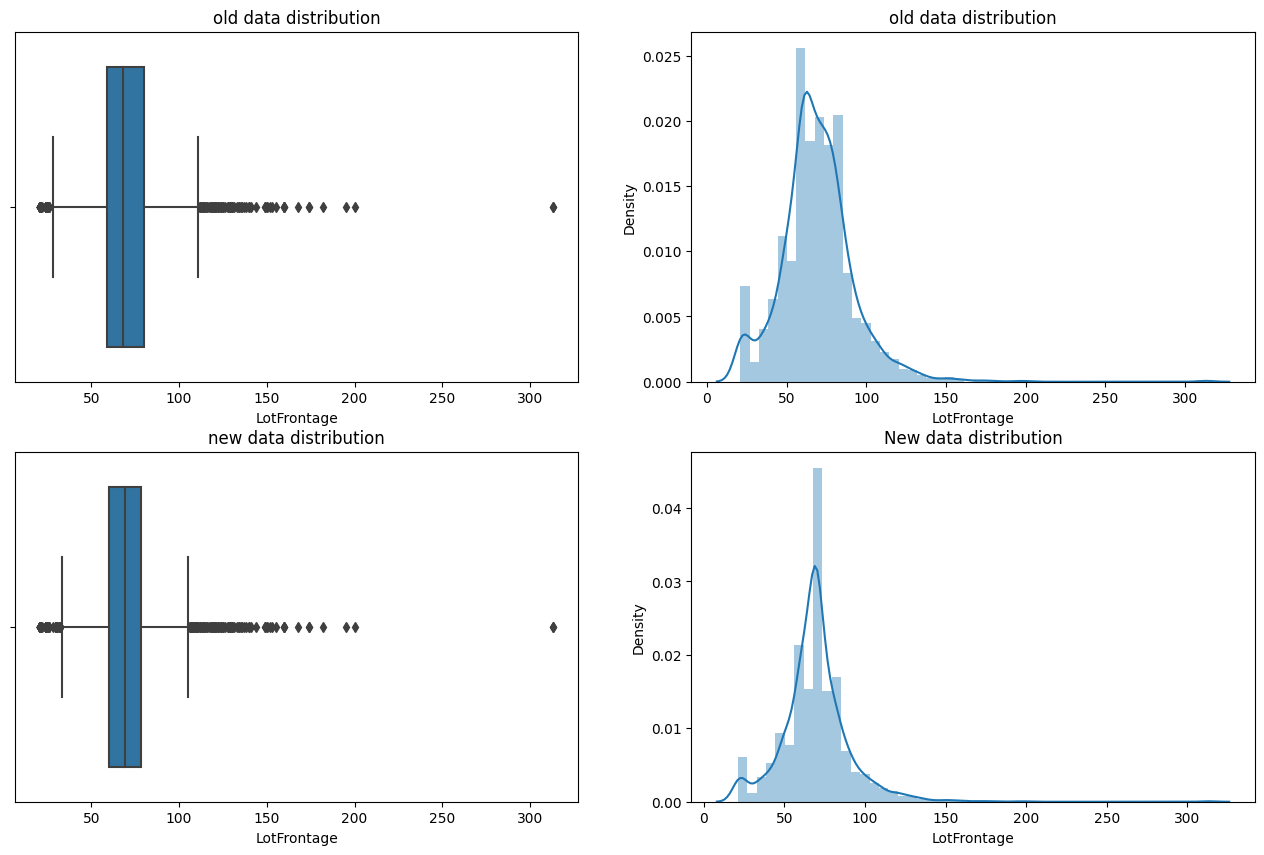

In [163]:
oldnewboxHistplot(df, df_mvi, "LotFrontage")

## Handling Utilities = 0.068527


In [164]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [165]:
utilities_mode = df_mvi["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,utilities_mode, inplace=True)
df_mvi["Utilities"].isnull().sum()

0

## Handling Exterior2nd = 0.034258


In [166]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [167]:
df["Exterior2nd"].value_counts()


Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [168]:
exterior1st_mode = df_mvi["Exterior1st"].mode()[0]
exterior2nd_mode = df_mvi["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan,exterior1st_mode, inplace=True)
df_mvi["Exterior2nd"].replace(np.nan,exterior2nd_mode, inplace=True)

print("E1st is null:", df_mvi["Exterior1st"].isnull().sum())
print("E1st is null:", df_mvi["Exterior2nd"].isnull().sum())

E1st is null: 0
E1st is null: 0


## hendeling MasVnrType = 0.822199 MasVnrArea = 0.787941

<Axes: ylabel='Id'>

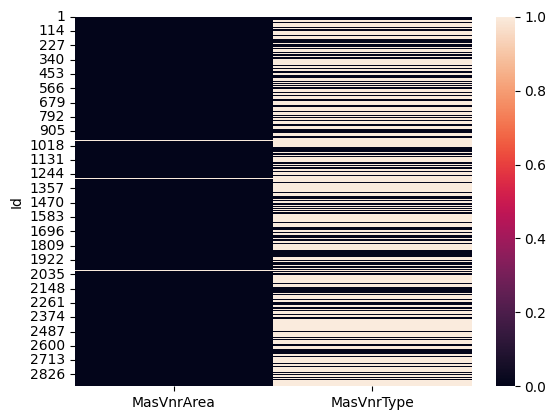

In [169]:
# sns.histplot(x="MasVnrArea" ,  y= "MasVnrType", data=df )
sns.heatmap(df[["MasVnrArea" , "MasVnrType"]].isnull())

In [170]:
df[df[["MasVnrArea" , "MasVnrType"]].isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN


In [171]:
df["MasVnrType"].value_counts()
# df["MasVnrArea"].value_counts()


MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [172]:
MasVnrType_mode = df_mvi["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan,MasVnrType_mode, inplace=True)
df_mvi["MasVnrType"].isnull().sum()

0

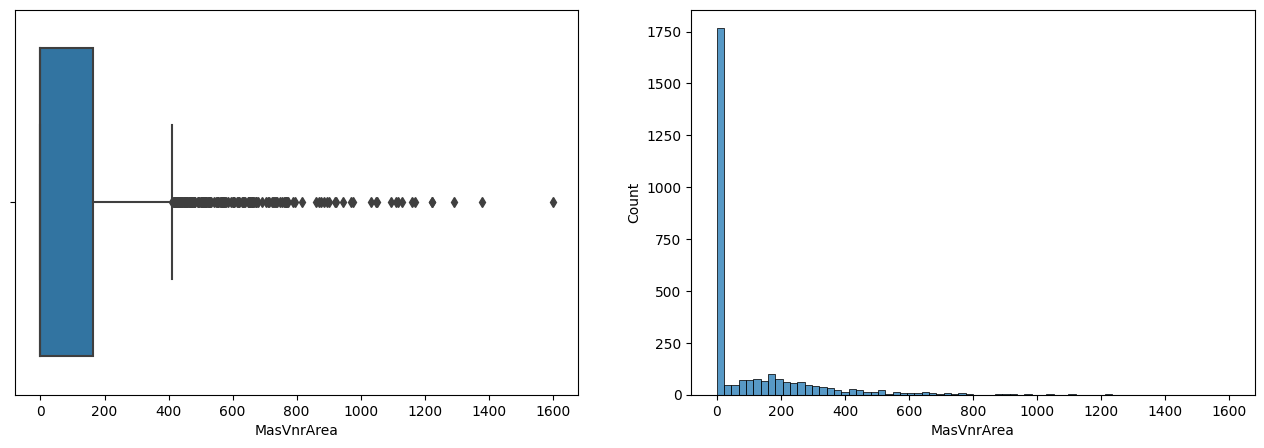

In [173]:

boxHistplot(df, "MasVnrArea")



In [174]:
MasVnrArea_cont = 0
df_mvi["MasVnrArea"].replace(np.nan,MasVnrArea_cont, inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

0

## Handling Bsmt Features


BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665

BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517

In [175]:
cat_bsmt_feat = [
"BsmtQual",        
"BsmtCond",       
"BsmtExposure",    
"BsmtFinType1", 
"BsmtFinType2" ]   

num_bsmt_feat =[
"BsmtFinSF1",
"BsmtFinSF2" ,      
"BsmtUnfSF"   ,     
"TotalBsmtSF" ,    
"BsmtFullBath" ,   
"BsmtHalfBath" ]    

<Axes: ylabel='Id'>

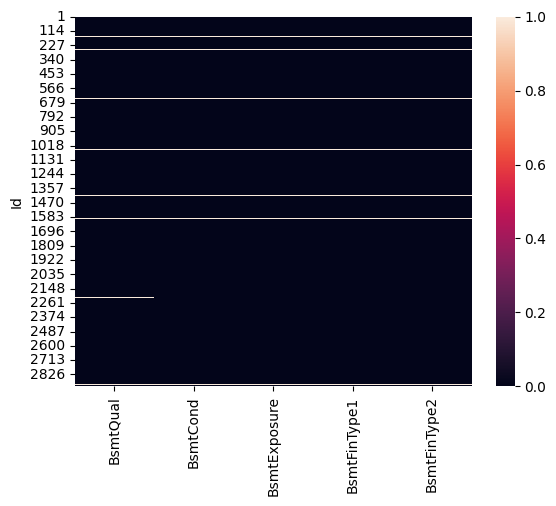

In [176]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [177]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat:
    print(f"value count of {feat} :{df[feat].value_counts()}")

value count of BsmtQual :BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count of BsmtCond :BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value count of BsmtExposure :BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value count of BsmtFinType1 :BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
value count of BsmtFinType2 :BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


<Axes: ylabel='Id'>

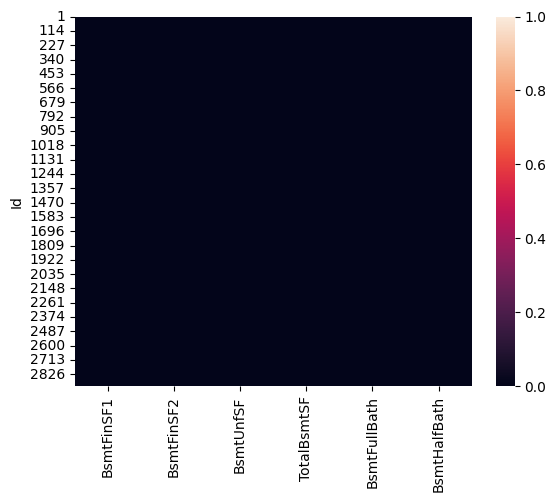

In [178]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [179]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2805,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2825,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
bsmt_num = 0
for feat in num_bsmt_feat:
   df_mvi[feat].replace(np.nan, bsmt_num, inplace=True )

In [181]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

## Handling Electrical = 0.034258 KitchnQual = 0.034285

In [182]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [183]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [184]:
df_ekk = df[["Electrical", "KitchenQual" , "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [185]:
Electrical_mode = df_mvi["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,Electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

0

In [186]:
KitchenQual_mode = df_mvi["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,KitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

0

# hendling Remaining cat feature


Functional       0.068517
FireplaceQu     48.646797
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871

GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071

In [187]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [188]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [189]:
Functional_mode = df_mvi["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,Functional_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

0

In [190]:
SaleType_mode = df_mvi["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,SaleType_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

0

In [191]:
other_cat_feat =["FireplaceQu",
"PoolQC",     
"Fence" ,      
"MiscFeature", 
"SaleType"  ,  
"SalePrice"]

for feat in other_cat_feat:
    print(f"value count of {feat}:{df[feat].value_counts()}")

value count of FireplaceQu:FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
value count of PoolQC:PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
value count of Fence:Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
value count of MiscFeature:MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64
value count of SaleType:SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64
value count of SalePrice:SalePrice
140000.0    20
135000.0    17
155000.0    14
145000.0    14
190000.0    13
            ..
202665.0     1
164900.0     1
208300.0     1
181500.0     1
147500.0     1
Name: count, Length: 663, dtype: int64


In [192]:
FireplaceQu_cont ="NA"
df_mvi["FireplaceQu"].replace(np.nan,FireplaceQu_cont, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()


0

In [193]:
PoolQC_cont ="NA"
df_mvi["PoolQC"].replace(np.nan,PoolQC_cont, inplace=True)
df_mvi["PoolQC"].isnull().sum()

0

In [194]:
Fence_cont="NA"
df_mvi["Fence"].replace(np.nan,Fence_cont, inplace=True)
df_mvi["Fence"].isnull().sum()

0

In [195]:
MiscFeature_cont ="NA"
df_mvi["MiscFeature"].replace(np.nan,MiscFeature_cont, inplace=True)
df_mvi["MiscFeature"].isnull().sum()

0

In [196]:
SaleType_cont ="NA"
df_mvi["SaleType"].replace(np.nan,SaleType_cont, inplace=True)
df_mvi["SaleType"].isnull().sum()

0

In [197]:
SaleType_cont ="NA"
df_mvi["SaleType"].replace(np.nan,SaleType_cont, inplace=True)
df_mvi["SaleType"].isnull().sum()

0

In [198]:
gar_cat_feat= ["GarageType",   
"GarageQual","GarageCond", "GarageFinish"
]
gar_num_feat = ["GarageArea","GarageCars","GarageYrBlt"]

In [199]:
df_garafe = df[gar_cat_feat + gar_num_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageType,GarageQual,GarageCond,GarageFinish,GarageArea,GarageCars,GarageYrBlt
Id,,,,,,,
40,NaN,NaN,NaN,NaN,0.0,0.0,NaN
49,NaN,NaN,NaN,NaN,0.0,0.0,NaN
79,NaN,NaN,NaN,NaN,0.0,0.0,NaN
89,NaN,NaN,NaN,NaN,0.0,0.0,NaN
90,NaN,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
2894,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2910,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2914,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [200]:
garage_cont= "NA"
for feat in gar_cat_feat:
    df_mvi[feat].replace(np.nan, garage_cont, inplace=True)
df_mvi[gar_cat_feat].isnull().sum()

GarageType      0
GarageQual      0
GarageCond      0
GarageFinish    0
dtype: int64

In [201]:
garage_num= 0
for feat in gar_num_feat:
    df_mvi[feat].replace(np.nan, garage_num, inplace=True)
df_mvi[gar_num_feat].isnull().sum()

GarageArea     0
GarageCars     0
GarageYrBlt    0
dtype: int64

In [202]:
df_mvi.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

## feature transformation

Convert numerical Feature to catagorical feature

In [203]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [204]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [205]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [206]:
calendar.month_abbr[12]

'Dec'

In [207]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [208]:
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [209]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}") 

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


## convert Categorical Features into Numerical Feature 

Ordinal Encoding

In [210]:
ordinal_end_var = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities"
    
]

print("Total numbre of feature  to convert ordinal numerical format:", len(ordinal_end_var))

Total numbre of feature  to convert ordinal numerical format: 18


In [211]:
df_mvi["ExterQual"].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [212]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "Gd", "TA", "Ex"],ordered=True)).cat.codes

In [213]:
df_mvi["ExterQual"].value_counts()

ExterQual
3    1798
2     979
4     107
1      35
Name: count, dtype: int64

In [214]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64

In [215]:

df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA", "No", "Mn", "Av", "Gd"],ordered=True)).cat.codes

In [216]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
 1    1904
 3     418
 4     276
 2     239
-1      82
Name: count, dtype: int64

In [217]:
df_mvi["ExterCond"] = df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"],ordered=True)).cat.codes

df_mvi["BsmtQual"] = df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "Ta", "Gd", "Ex"],ordered=True)).cat.codes

df_mvi["BsmtCond"] = df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "Ta", "Gd", "Ex"],ordered=True)).cat.codes

df_mvi["BsmtFinSF1"] = df_mvi["BsmtFinSF1"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],ordered=True)).cat.codes

df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],ordered=True)).cat.codes

df_mvi["HeatingQC"]= df_mvi["HeatingQC"].astype(CategoricalDtype(categories=[ "Wall", "OthW","Grav","GasW","GasA","Floor" ],ordered=True)).cat.codes

df_mvi["KitchenQual"] = df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd", "Ex" ],ordered=True)).cat.codes

df_mvi["FireplaceQu"] = df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"],ordered=True)).cat.codes

df_mvi["GarageQual"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"],ordered=True)).cat.codes

df_mvi["GarageCond"] = df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"],ordered=True)).cat.codes

df_mvi["PoolQC"] = df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA","Fa", "TA", "Gd", "Ex"],ordered=True)).cat.codes

df_mvi["Functional"] = df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal", "Sev", "Maj2", "Maj1", "Mod","Min2","Min1", "Typ"],ordered=True)).cat.codes

df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA", "Unf", "RFn", "Fin"],ordered=True)).cat.codes

df_mvi["PavedDrive"] = df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"],ordered=True)).cat.codes

df_mvi["Utilities"] = df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO", "NASewa", "NASeWr", "AllPub"],ordered=True)).cat.codes

In [218]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

## One Hot Encoding for Nominal Categorical Data

In [219]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total Objecct data type features:", len(object_features))

print("Features:\n ", object_features)

Total Objecct data type features: 33
Features:
  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [220]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,Alley_cons,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,Alley_cons,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal


In [221]:
print("shape of DF befor encoding:", df_encod.shape)
df_encod = pd.get_dummies(df_encod, columns=object_features, prefix=object_features, drop_first=True)
print("shape of DF after encoding:", df_encod.shape)


shape of DF befor encoding: (2919, 80)
shape of DF after encoding: (2919, 516)


In [222]:
# df_encod["MSZoning"].value_counts()

In [223]:
# pd.get_dummies(df_encod["MSZoning"], columns="MSZoning", prefix="MSZoning", drop_first=True)

In [224]:
df_encod.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,2,2,4,-1,...,False,False,False,False,True,False,False,False,True,False
2,80.0,9600,3,6,8,0.0,3,2,4,-1,...,False,False,False,False,True,False,False,False,True,False


In [225]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

## Split Data for Traning and Testing

In [226]:
df_encod.shape

(2919, 516)

In [227]:
len_train = house_train.shape[0]
len_train

1460

In [228]:
x_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod["SalePrice"][:len_train]
x_test  = df_encod[len_train:].drop("SalePrice", axis=1)
print("Shape of x_train data : ", x_train.shape)
print("Shape of y_train data : ", y_train.shape)
print("Shape of x_test data : ", x_test.shape)

Shape of x_train data :  (1460, 515)
Shape of y_train data :  (1460,)
Shape of x_test data :  (1459, 515)


## Feature Scaling

In [229]:
sc = StandardScaler()
sc.fit(x_train)
# formula = z= (x-u)"/System Volume Information"
x_train = sc.transform(x_train)
x_test= sc.transform(x_test)


In [230]:
x_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [231]:
x_test[:3,:]

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [232]:
sc.mean_

array([ 6.99179459e+01,  1.05168281e+04,  2.99726027e+00,  6.09931507e+00,
        5.57534247e+00,  1.03117123e+02,  2.68219178e+00,  2.08356164e+00,
        1.68561644e+00, -6.82191781e-01,  1.60410959e+00, -1.00000000e+00,
        1.22123288e+00,  4.65493151e+01,  5.67240411e+02,  1.05742945e+03,
       -1.00000000e+00,  1.16262671e+03,  3.46992466e+02,  5.84452055e+00,
        1.51546370e+03,  4.25342466e-01,  5.75342466e-02,  1.56506849e+00,
        3.82876712e-01,  2.86643836e+00,  1.04657534e+00,  2.51164384e+00,
        6.51780822e+00,  6.84178082e+00,  6.13013699e-01,  2.81027397e+00,
        1.71575342e+00,  1.76712329e+00,  4.72980137e+02, -1.00000000e+00,
        2.80890411e+00,  1.85616438e+00,  9.42445205e+01,  4.66602740e+01,
        2.19541096e+01,  3.40958904e+00,  1.50609589e+01,  2.75890411e+00,
        1.30136986e-02,  4.34890411e+01,  0.00000000e+00,  4.31506849e-02,
        6.84931507e-03,  2.05479452e-02,  3.67123288e-01,  4.72602740e-02,
        2.73972603e-03,  

In [233]:
sc.n_features_in_

515

In [234]:
sc.n_samples_seen_

1460

In [235]:
sc.scale_

array([2.20183141e+01, 9.97784611e+03, 1.04648927e-01, 1.38252284e+00,
       1.11241818e+00, 1.80669468e+02, 5.54271697e-01, 3.50933666e-01,
       2.56300043e+00, 1.13793161e+00, 1.11747494e+00, 1.00000000e+00,
       9.41269101e-01, 1.61264017e+02, 4.41715605e+02, 4.38555057e+02,
       1.00000000e+00, 3.86455322e+02, 4.36378914e+02, 4.86064268e+01,
       5.25300394e+02, 5.18732867e-01, 2.38670868e-01, 5.50727099e-01,
       5.02713131e-01, 8.15498620e-01, 2.20262727e-01, 6.63532501e-01,
       1.62483655e+00, 6.67468828e-01, 6.44445572e-01, 7.22650132e-01,
       8.92525151e-01, 7.47059036e-01, 2.13731608e+02, 1.00000000e+00,
       7.19438635e-01, 4.96421800e-01, 1.25295863e+02, 6.62333334e+01,
       6.10982138e+01, 2.93072887e+01, 5.57383170e+01, 4.01635452e+01,
       2.03988886e-01, 4.95953090e+02, 1.00000000e+00, 2.03196219e-01,
       8.24766752e-02, 1.41865172e-01, 4.82020518e-01, 2.12195053e-01,
       5.22706412e-02, 9.02863400e-02, 2.98164775e-01, 4.03551391e-01,
      

## Train Ml MOdel

In [236]:
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [237]:
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [238]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr= GaussianProcessRegressor()
dtr= DecisionTreeRegressor()
gbr= GradientBoostingRegressor()
rfr= RandomForestRegressor()
mlpr= MLPRegressor()
ir = IsotonicRegression()
xgbr = XGBRegressor()



In [239]:
models= {"a":["LinearRegression", lr],
"b":["SVR", svr],
"c":["SGDRegressor", sgdr],
"d":["KNeighborsRegressor", knr],
"e":["GaussianProcessRegressor", gpr],
"f":["DecisionTreeRegressor", dtr],
"g":["GradientBoostingRegressor", gbr],
"h":[" RandomForestRegressor", rfr],
"i":["XGBRegressor", xgbr],
"j":["MLPRegressor", mlpr],
"k":["IsotonicRegression", ir]
}

In [242]:

from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import KFold , cross_val_predict
def test_model(model, X_train=x_train, Y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True , random_state= 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, Y_train, cv=cv, scoring= r2)
    score = [r2_val_score.mean()]
    return score

In [243]:
model_score = []
for model in models:
    print("Training model:", models[model][0])
    score =test_model(models[model][1], x_train, y_train)
    print("Score of model: ", score)
    model_score.append([models[model][0], score[0]])

Training model: LinearRegression
Score of model:  [-6.183326489633019e+24]
Training model: SVR
Score of model:  [-0.05214766787859548]
Training model: SGDRegressor
Score of model:  [-6148.919088209309]
Training model: KNeighborsRegressor
Score of model:  [0.5519904331564068]
Training model: GaussianProcessRegressor
Score of model:  [-5.398593729726135]
Training model: DecisionTreeRegressor
Score of model:  [0.6674858649581565]
Training model: GradientBoostingRegressor
Score of model:  [0.8776960826557111]
Training model:  RandomForestRegressor
Score of model:  [0.8419454290160948]
Training model: XGBRegressor
Score of model:  [0.8413538459703954]
Training model: MLPRegressor


c:\Users\supri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\supri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\supri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\supri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Score of model:  [-4.838294948659595]
Training model: IsotonicRegression


c:\Users\supri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\supri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\supri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\isotonic.py", line 351, in fit
    X, y = self._build_y(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\supri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\isotonic.py", line 266, in _build_y
    self._check_input_data_shape(X)
  File "c:\Users\supri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\isotonic.py", line 250, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature


model scrose

Training model: LinearRegression
Score of model:  [-6.183326489633019e+24]
Training model: SVR
Score of model:  [-0.05214766787859548]
Training model: SGDRegressor
Score of model:  [-6148.919088209309]
Training model: KNeighborsRegressor
Score of model:  [0.5519904331564068]
Training model: GaussianProcessRegressor
Score of model:  [-5.398593729726135]
Training model: DecisionTreeRegressor
Score of model:  [0.6674858649581565]
Training model: GradientBoostingRegressor
Score of model:  [0.8776960826557111]
Training model:  RandomForestRegressor
Score of model:  [0.8419454290160948]
Training model: XGBRegressor
Score of model:  [0.8413538459703954]
Training model: MLPRegressor
Score of model:  [-4.838294948659595]
